In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [31]:
def lorenz(X, Beta):
    """
    Inputs:
    X: 3x1 numpy array of (x, y, z)^T
    Beta: 3x1 numpy array of (sigma, rho, beta)^T

    Output:
    X_dot: 3x1 numpy array of (sigma*(y-x), x*(rho-z)-y, x*y-beta*y)^T
    """
    return np.array([Beta[0]*(X[1]-X[0]), X[0]*(Beta[1]-X[2])-X[1], X[0]*X[1]-Beta[2]*X[2]])

In [32]:
dt = 0.001
num_steps = 100000

# chaotic values used by Lorenz
Beta = np.array([10, 28, 8/3])

solution = np.empty((3, num_steps + 1))

# initial values
solution[0,0] = 0
solution[1,0] = 1
solution[2,0] = 1.05

In [33]:
# (forward euler?) numerical solution https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html
for i in range(num_steps):
    X_dot = lorenz(solution[:,i], Beta)
    solution[:, i+1] = solution[:, i] + X_dot * dt

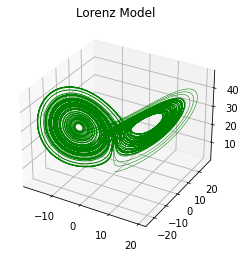

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(solution[0,:], solution[1,:], solution[2,:], lw=0.5, color = 'green')
ax.set_title("Lorenz Model")

plt.show()

In [35]:
# solving using scipy (Range-Kutta method? https://www.youtube.com/watch?v=EXvLju3DLMY)

from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

# new lorenz function with time

def lorenz2(X, t, Beta = [10, 28, 8/3]):
    """
    Inputs:
    X: 3x1 numpy array of (x, y, z)^T
    Beta: 3x1 numpy array of (sigma, rho, beta)^T

    Output:
    X_dot: 3x1 numpy array of (sigma*(y-x), x*(rho-z)-y, x*y-beta*y)^T
    """
    return np.array([Beta[0]*(X[1]-X[0]), X[0]*(Beta[1]-X[2])-X[1], X[0]*X[1]-Beta[2]*X[2]])


In [51]:
solution2 = odeint(lorenz2, [0, 1, 1.05], np.arange(dt, 60, dt))
solution2 = np.transpose(solution2)
print(solution)
print(solution2)

[[ 0.00000000e+00  1.00000000e-02  1.98900000e-02 ... -6.32934036e-01
  -6.25909084e-01 -6.19008844e-01]
 [ 1.00000000e+00  9.99000000e-01  9.98270528e-01 ...  6.95611400e-02
   6.41149676e-02  5.87013330e-02]
 [ 1.05000000e+00  1.04720000e+00  1.04441746e+00 ...  1.95052582e+01
   1.94532001e+01  1.94012848e+01]]
[[ 0.00000000e+00  9.94564193e-03  1.97850148e-02 ... -2.52466481e+00
  -2.55864867e+00 -2.59230599e+00]
 [ 1.00000000e+00  9.99134716e-01  9.98536842e-01 ... -5.93956155e+00
  -5.94061515e+00 -5.94189471e+00]
 [ 1.05000000e+00  1.04720870e+00  1.04443471e+00 ...  2.52746138e+01
   2.52223824e+01  2.51704936e+01]]


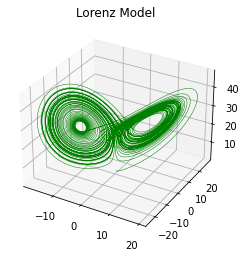

In [53]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(solution2[0,:], solution2[1,:], solution2[2,:], lw=0.5, color = 'green')
ax.set_title("Lorenz Model")

plt.show()